In [52]:
import pandas as pd
import numpy as np
import os, fnmatch
import matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm
%matplotlib inline

In [74]:
root = '/Users/Lee/Documents/jupyter/notebooks/CP207/CPS Data'
#Get all of the cost reports
matches = []
for root, dirnames, filenames in os.walk(root):
  for filename in fnmatch.filter(filenames, '*.dta'):
    matches.append(os.path.join(root, filename))

In [75]:
len(matches)

11

In [ ]:
#df = pd.read_stata('CPS Data/2015/cpsmar2015.dta', convert_categoricals = False)

In [29]:
columns_to_keep = ['h_year', 'a_age', 'a_hscol', 'a_ftpt', 'perrp']

In [33]:
def process_CPS_file(path):
    print 'Processing {}'.format(path)
    df_in = pd.read_stata(path, convert_categoricals = False, columns=columns_to_keep)
    df_in['In Sample'] = df_in.apply(in_sample, axis = 1)
    df_in = df_in[df_in['In Sample'] == 1]
    return df_in

In [34]:
df = pd.DataFrame()
for item in matches:
    if not df.empty:
        df = df.append(process_CPS_file(item))
    else:
        df = process_CPS_file(item)

Processing /Users/Lee/Documents/jupyter/notebooks/CP207/CPS Data/2000/cpsmar2000.dta
Processing /Users/Lee/Documents/jupyter/notebooks/CP207/CPS Data/2001/cpsmar2001.dta
Processing /Users/Lee/Documents/jupyter/notebooks/CP207/CPS Data/2002/cpsmar2002.dta
Processing /Users/Lee/Documents/jupyter/notebooks/CP207/CPS Data/2003/cpsmar2003.dta
Processing /Users/Lee/Documents/jupyter/notebooks/CP207/CPS Data/2004/cpsmar2004.dta
Processing /Users/Lee/Documents/jupyter/notebooks/CP207/CPS Data/2005/cpsmar2005.dta
Processing /Users/Lee/Documents/jupyter/notebooks/CP207/CPS Data/2006/cpsmar06.dta
Processing /Users/Lee/Documents/jupyter/notebooks/CP207/CPS Data/2007/cpsmar07.dta
Processing /Users/Lee/Documents/jupyter/notebooks/CP207/CPS Data/2008/cpsmar08.dta
Processing /Users/Lee/Documents/jupyter/notebooks/CP207/CPS Data/2009/cpsmar09.dta
Processing /Users/Lee/Documents/jupyter/notebooks/CP207/CPS Data/2010/cpsmar10.dta
Processing /Users/Lee/Documents/jupyter/notebooks/CP207/CPS Data/2011/cpsma

In [18]:
def in_sample(row):
    #In sample if between 18 and 34 AND (not in college or not full time)
    if row['a_age'] >= 18 and row['a_age'] < 35 and not (row['a_age'] < 25 and (row['a_hscol'] == 2 and row['a_ftpt'] == 1)):
        return 1
    else:
        return 0

In [35]:
def independently(row):
    if row['perrp'] in [1, 2, 3, 10, 12, 13, 14, 15, 16, 17 , 18]:
        return 1
    else:
        return 0

In [22]:
len(df)

3027571

In [21]:
len(df[df['In Sample'] == 1])

575885

In [24]:
df = df[df['In Sample'] == 1]

In [25]:
len(df)

575885

In [36]:
df['Living Independently'] = df.apply(independently, axis = 1)

In [37]:
pd.pivot_table(df, values='a_age', index=['h_year'], columns=['Living Independently'], aggfunc=np.count_nonzero)

Living Independently,0,1
h_year,,
2000,7284,20085
2001,6886,18966
2002,11133,31048
2003,11104,30438
2004,10914,29426
2005,10668,29182
2006,10814,28376
2007,10812,27766
2008,10987,27507


## Why is 2014 low?? Do I need to process the early or late part separately?

In [38]:
df_plot = pd.pivot_table(df, values='a_age', index=['h_year'], columns=['Living Independently'], aggfunc=np.count_nonzero)

In [45]:
df_plot['Total'] = df_plot[0] + df_plot[1]

In [46]:
df_plot['pct_independent'] = df_plot[1]*1.0/df_plot['Total']

In [47]:
df_plot

Living Independently,0,1,Total,pct_independent
h_year,,,,
2000,7284,20085,27369,0.733859
2001,6886,18966,25852,0.733638
2002,11133,31048,42181,0.736066
2003,11104,30438,41542,0.732704
2004,10914,29426,40340,0.729450
2005,10668,29182,39850,0.732296
2006,10814,28376,39190,0.724062
2007,10812,27766,38578,0.719737
2008,10987,27507,38494,0.714579


In [49]:
%matplotlib inline

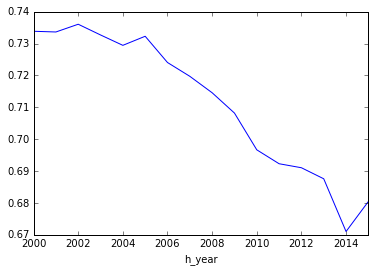

In [50]:
df_plot['pct_independent'].plot()

In [53]:
# define the font styles
title_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=15, weight='normal', stretch='normal')
label_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=12, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=10, weight='normal', stretch='normal')
annotation_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=10, weight='normal', stretch='normal')
axis_bgcolor = '#f0f0f0'

In [54]:
# make a re-usable function to draw nice bar charts
def line_chart(data, title='', xlabel='', ylabel='', color='k', ylim=None):
    
#     ax = data.plot(kind='bar', figsize=[9, 6], width=0.6, alpha=0.6, 
#                    color=color, edgecolor='k', grid=False, ylim=ylim)
    
    ax = data.plot(kind='line', figsize=[9, 6], alpha=0.8, 
                    grid=False, ylim=ylim, x_compat = True,
                   linewidth = 2, marker = 'o',
                  color = color)
    
    ax.set_xticklabels(data.index, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
    ax.yaxis.grid(True)
    for label in ax.get_yticklabels():
        label.set_fontproperties(ticks_font)

    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        #bottom='off',      # ticks along the bottom edge are off
        top='off'         # ticks along the top edge are off
        )

    plt.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        right='off',      # ticks along the bottom edge are off
        )

    ax.set_axis_bgcolor(axis_bgcolor)   
    ax.set_title(title, fontproperties=title_font)
    ax.set_xlabel(xlabel, fontproperties=label_font)
    ax.set_ylabel(ylabel, fontproperties=label_font)
    
    for label in ax.get_yticklabels():
        label.set_fontproperties(ticks_font)

    plt.show()

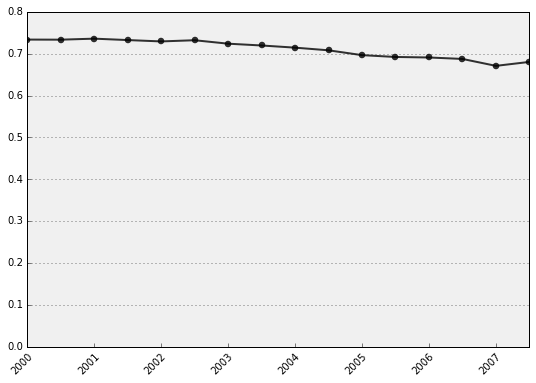

In [58]:
line_chart(df_plot['pct_independent'], ylim=[0,0.8])

In [77]:
matches[-2]

'/Users/Lee/Documents/jupyter/notebooks/CP207/CPS Data/morg14.dta'

In [78]:
df2 = pd.read_stata(matches[-2], convert_categoricals = False)

In [65]:
columns_to_keep

['h_year', 'a_age', 'a_hscol', 'a_ftpt', 'perrp']

In [66]:
columns_to_keep2 = ['cbsafips', 'age', 'studftpt', 'schlvl', 'relref95']

In [79]:
df2 = df2[columns_to_keep2]

In [80]:
df2.head()

,cbsafips,age,studftpt,schlvl,relref95
0,26620,80,NaN,NaN,1
1,26620,66,NaN,NaN,3
2,26620,29,NaN,NaN,4
3,13820,85,NaN,NaN,2
4,33860,27,NaN,NaN,1


In [113]:
def in_sample2(data):
    #In sample if between 18 and 34 AND (not in college or not full time)
#     if row['age'] >= 18 and row['age'] < 35 and not (row['age'] < 25 and (row['schlvl'] == 2 and row['studftpt'] == 1)):
#         return 1
#     else:
#         return 0
    return ((data['age'] >= 18) & (data['age'] < 35) & ~((data['age'] < 25) & ((data['schlvl'] == 2) & (data['studftpt'] == 1)))).apply(lambda x: 1 if x else 0)

In [111]:
def independently2(data):
    #if row['relref95'] in [1, 2, 3, 10, 12, 13, 14, 15, 16, 17 , 18]:
#     if row['relref95'] in [1, 2, 3, 13, 14, 15, 16, 17 , 18]:
#         return 1
#     else:
#         return 0
    return data['relref95'].isin([1, 2, 3, 13, 14, 15, 16, 17 , 18]).apply(lambda x: 1 if x else 0)

In [108]:
df2['relref95'].isin([1, 2, 3, 13, 14, 15, 16, 17 , 18]).apply(lambda x: 1 if x else 0)

0    1
1    1
2    0
3    1
4    1
Name: relref95, dtype: int64

In [103]:
df2['In Sample2'] = (df2['age'] >= 18) & (df2['age'] < 35) & ~((df2['age'] < 25) & ((df2['schlvl'] == 2) & (df2['studftpt'] == 1)))

In [81]:
df2['In Sample'] = df2.apply(in_sample2, axis = 1)

In [93]:
df2['Living Independently'] = df2.apply(independently2, axis = 1)

In [99]:
df2['Living Independently'] = df2['relref95'].isin([1, 2, 3, 13, 14, 15, 16, 17 , 18])

In [95]:
df2['Millenial'] = df2.apply(lambda row: 1 if row['age'] >= 18 and row['age'] < 35 else 0, axis = 1)

In [97]:
def pct_pivot(data, index=['In Sample'], columns=['Living Independently']):
    table = pd.pivot_table(data, values='age', index=index, columns=columns,
               aggfunc=np.count_nonzero,
              margins=True)
    return table.div( table.iloc[:,-1], axis=0 )

In [94]:
pct_pivot(df2)

Living Independently,0,1,All
In Sample,,,
0,0.143384,0.856616,1
1,0.323323,0.676677,1
All,0.186021,0.813979,1


In [98]:
pct_pivot(df2, index=['Millenial'])

Living Independently,0,1,All
Millenial,,,
0,0.118851,0.881149,1
1,0.369496,0.630504,1
All,0.186021,0.813979,1
